In [1]:
using NamedTrajectories
using QuantumCollocation
using LinearAlgebra

In [6]:
data_path = "results/T_500_Δt_0.4_a_bound_0.25132741228718347_dda_bound_0.05_dt_min_0.2_dt_max_0.4_max_iter_100000_00000.jld2"

"results/T_500_Δt_0.4_a_bound_0.25132741228718347_dda_bound_0.05_dt_min_0.2_dt_max_0.4_max_iter_100000_00000.jld2"

In [7]:
data = load_problem(data_path; return_data=true)

Loading data dict from results/T_500_Δt_0.4_a_bound_0.25132741228718347_dda_bound_0.05_dt_min_0.2_dt_max_0.4_max_iter_100000_00000.jld2:

   pade rollout fidelity = 0.9999133335752882
   exp rollout fidelity = 0.9999139155047266
   solver fidelity = 0.9999656632367825
   pulse duration = 194.56299253325216


Dict{String, Any} with 8 entries:
  "options"               => Options{Float64}(1.0e-8, 100.0, 100000, 1.0e6, 1.0…
  "pade rollout fidelity" => 0.999913
  "exp rollout fidelity"  => 0.999914
  "params"                => Dict{Symbol, Any}(:eval_hessian=>true, :objective_…
  "solver fidelity"       => 0.999966
  "system"                => QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 -0.…
  "trajectory"            => NamedTrajectory([1.0 1.0 … 1.00095 1.00102; 0.0 -1…
  "pulse duration"        => 194.563

In [8]:
traj = data["trajectory"]
system = data["system"]
params = data["params"]

Dict{Symbol, Any} with 6 entries:
  :eval_hessian          => true
  :objective_terms       => Dict[Dict{Symbol, Any}(:loss=>:UnitaryInfidelityLos…
  :dynamics              => AbstractIntegrator[UnitaryPadeIntegrator{Float64}(s…
  :linear_constraints    => AbstractConstraint[TimeStepsAllEqualConstraint([147…
  :options               => Options{Float64}(1.0e-8, 100.0, 100000, 1.0e6, 1.0,…
  :nonlinear_constraints => Any[]

In [9]:
U_goal = traj.goal.Ũ⃗ |> iso_vec_to_operator

8×8 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  1.0+0.0im

In [10]:
# |0⟩ rollout test
ψ = qubit_system_state("100")
ψ̃ = ket_to_iso(ψ)
ψ̃_goal = ket_to_iso(U_goal * ψ)
Ψ̃ = rollout(ψ̃, traj.a, traj.Δt, system)
Ψ̃_exp = rollout(ψ̃, traj.a, traj.Δt, system; integrator=exp);

In [11]:
pade_rollout_fidelity = fidelity(Ψ̃[:, end], ψ̃_goal)
exp_rollout_fidelity = fidelity(Ψ̃_exp[:, end], ψ̃_goal)

0.9999139155047266

In [12]:
println("|100⟩ → U|100⟩ = |001⟩ pade rollout fidelity:  ", pade_rollout_fidelity)
println("|100⟩ → U|100⟩ = |001⟩ exp rollout fidelity:   ", exp_rollout_fidelity)

|100⟩ → U|100⟩ = |001⟩ pade rollout fidelity:  0.9999133335752882
|100⟩ → U|100⟩ = |001⟩ exp rollout fidelity:   0.9999139155047266


In [13]:
G(U) = 1 - abs2(tr(U_goal'U)) / size(U, 1)^2

G (generic function with 1 method)

In [14]:
G(iso_vec_to_operator(traj.Ũ⃗[:, end]))

6.867234742169437e-5

In [15]:
rollout_traj = NamedTrajectory(
    (
        ψ̃ = Ψ̃_exp,
        a = traj.a,
        Δt = traj.Δt,
    );
    timestep=:Δt,
    controls=(:a, :Δt),
)

NamedTrajectory([0.0 0.0 … -0.006003641459566156 -0.0010491823401392122; 0.0 -7.45865328696732e-5 … 0.9897721721810955 0.9999437488440875; … ; 0.0 0.0012484094665939271 … 0.01293028583996451 0.0; 0.38912598506650375 0.38912598506650375 … 0.38912598506650375 0.38912598506650375], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0003320075548128064, 0.0009282810385744289, 0.0009967587117025703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.38912598506650375], 500, :Δt, 23, (ψ̃ = 16, a = 6, Δt = 1, states = 16, controls = 7), NamedTuple(), NamedTuple(), NamedTuple(), NamedTuple(), (ψ̃ = 1:16, a = 17:22, Δt = 23:23, states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], controls = [17, 18, 19, 20, 21, 22, 23]), (:ψ̃, :a, :Δt), (:a, :Δt))

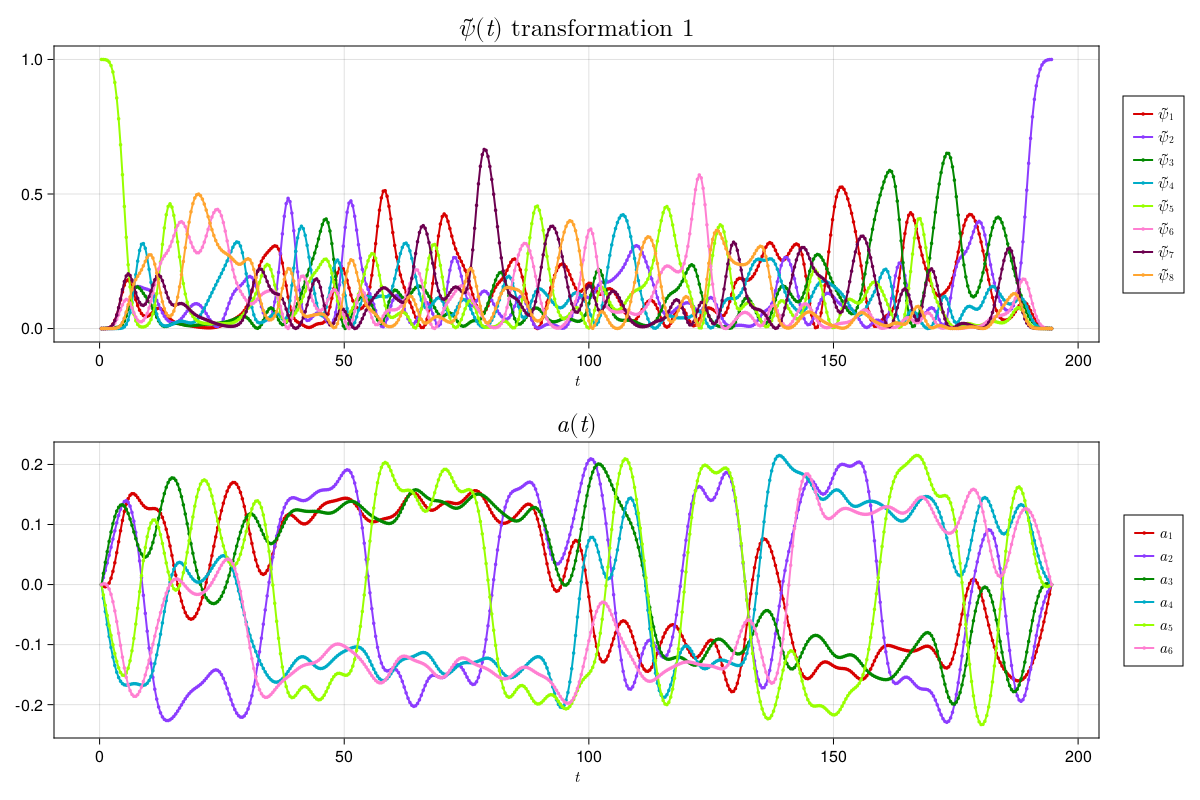

In [16]:
maps = Function[populations] 
transformations = Dict(
    :ψ̃ => maps 
)
plot(rollout_traj, [:a]; transformations=transformations, ignored_labels=[:ψ̃])